Geostrophic Wind and Other Calcuations
======================================

Demonstrate a variety of calculations in MetPy.

In [1]:
import metpy.calc as mpcalc
import xarray as xr
import numpy as np
from metpy.calc import geostrophic_wind
from metpy.calc import q_vector
from metpy.units import units
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.ndimage.filters import gaussian_filter

/tmp/ipykernel_459/2639708157.py:10: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


In [2]:
## opening NetCDF file using xarray 

ds = xr.open_mfdataset("/home/jovyan/metpy-cookbook/NETCDF_FILE.nc",combine = "nested", concat_dim="time",decode_times=True)

In [3]:
ds

<xarray.Dataset> Size: 2MB
Dimensions:  (time: 1, lev: 23, lat: 41, lon: 71)
Coordinates:
  * time     (time) datetime64[ns] 8B 2019-06-08
  * lon      (lon) float64 568B -130.5 -129.5 -128.5 ... -62.5 -61.5 -60.5
  * lat      (lat) float64 328B 20.5 21.5 22.5 23.5 24.5 ... 57.5 58.5 59.5 60.5
  * lev      (lev) float64 184B 1e+03 975.0 950.0 925.0 ... 300.0 250.0 200.0
Data variables:
    H        (time, lev, lat, lon) float32 268kB dask.array<chunksize=(1, 23, 41, 71), meta=np.ndarray>
    OMEGA    (time, lev, lat, lon) float32 268kB dask.array<chunksize=(1, 23, 41, 71), meta=np.ndarray>
    PS       (time, lat, lon) float32 12kB dask.array<chunksize=(1, 41, 71), meta=np.ndarray>
    QV       (time, lev, lat, lon) float32 268kB dask.array<chunksize=(1, 23, 41, 71), meta=np.ndarray>
    SLP      (time, lat, lon) float32 12kB dask.array<chunksize=(1, 41, 71), meta=np.ndarray>
    T        (time, lev, lat, lon) float32 268kB dask.array<chunksize=(1, 23, 41, 71), meta=np.ndarray>
    U        (time, lev, lat, lon) float32 268kB dask.array<chunksize=(1, 23, 41, 71), meta=np.ndarray>
    V        (time, lev, lat, lon) float32 268kB dask.array<chunksize=(1, 23, 41, 71), meta=np.ndarray>
Attributes: (12/33)
    CDI:                               Climate Data Interface version 1.9.8 (...
    Conventions:                       CF-1
    History:                           Original file generated: Tue Jun 18 21...
    Comment:                           GMAO filename: d5124_m2_jan10.inst3_3d...
    Filename:                          MERRA2_400.inst3_3d_asm_Np.20190608.nc4
    Institution:                       NASA Global Modeling and Assimilation ...
    ...                                ...
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2019-06-08
    RangeEndingTime:                   21:00:00.000000
    history_L34RS:                     'Created by L34RS v1.4.3 @ NASA GES DI...
    CDO:                               Climate Data Operators version 1.9.8 (...
    cdo_openmp_thread_number:          12

In [4]:
#### making a function to slice the xarray dataset according to our need.
def slicer (data,lat1, lat2, lon1, lon2, time1,time2) :
    sliced_data = data.sel(lat =slice(lat1, lat2), lon = slice(lon1, lon2),time = slice(time1, time2))
    return sliced_data

In [5]:
#slicing the data for CONUS only

new_data = slicer(ds,23.5,50.5,-125.5,-66.5, ds.time[0], ds.time[0])

In [6]:
new_data

<xarray.Dataset> Size: 942kB
Dimensions:  (time: 1, lev: 23, lat: 28, lon: 60)
Coordinates:
  * time     (time) datetime64[ns] 8B 2019-06-08
  * lon      (lon) float64 480B -125.5 -124.5 -123.5 ... -68.5 -67.5 -66.5
  * lat      (lat) float64 224B 23.5 24.5 25.5 26.5 27.5 ... 47.5 48.5 49.5 50.5
  * lev      (lev) float64 184B 1e+03 975.0 950.0 925.0 ... 300.0 250.0 200.0
Data variables:
    H        (time, lev, lat, lon) float32 155kB dask.array<chunksize=(1, 23, 28, 60), meta=np.ndarray>
    OMEGA    (time, lev, lat, lon) float32 155kB dask.array<chunksize=(1, 23, 28, 60), meta=np.ndarray>
    PS       (time, lat, lon) float32 7kB dask.array<chunksize=(1, 28, 60), meta=np.ndarray>
    QV       (time, lev, lat, lon) float32 155kB dask.array<chunksize=(1, 23, 28, 60), meta=np.ndarray>
    SLP      (time, lat, lon) float32 7kB dask.array<chunksize=(1, 28, 60), meta=np.ndarray>
    T        (time, lev, lat, lon) float32 155kB dask.array<chunksize=(1, 23, 28, 60), meta=np.ndarray>
    U        (time, lev, lat, lon) float32 155kB dask.array<chunksize=(1, 23, 28, 60), meta=np.ndarray>
    V        (time, lev, lat, lon) float32 155kB dask.array<chunksize=(1, 23, 28, 60), meta=np.ndarray>
Attributes: (12/33)
    CDI:                               Climate Data Interface version 1.9.8 (...
    Conventions:                       CF-1
    History:                           Original file generated: Tue Jun 18 21...
    Comment:                           GMAO filename: d5124_m2_jan10.inst3_3d...
    Filename:                          MERRA2_400.inst3_3d_asm_Np.20190608.nc4
    Institution:                       NASA Global Modeling and Assimilation ...
    ...                                ...
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2019-06-08
    RangeEndingTime:                   21:00:00.000000
    history_L34RS:                     'Created by L34RS v1.4.3 @ NASA GES DI...
    CDO:                               Climate Data Operators version 1.9.8 (...
    cdo_openmp_thread_number:          12

In [7]:
###extracting temperature, pressure, and geopotential from the dataset
gph = new_data.H
p =new_data.lev
T = new_data.T

In [8]:
gph

<xarray.DataArray 'H' (time: 1, lev: 23, lat: 28, lon: 60)> Size: 155kB
dask.array<getitem, shape=(1, 23, 28, 60), dtype=float32, chunksize=(1, 23, 28, 60), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 8B 2019-06-08
  * lon      (lon) float64 480B -125.5 -124.5 -123.5 ... -68.5 -67.5 -66.5
  * lat      (lat) float64 224B 23.5 24.5 25.5 26.5 27.5 ... 47.5 48.5 49.5 50.5
  * lev      (lev) float64 184B 1e+03 975.0 950.0 925.0 ... 300.0 250.0 200.0
Attributes:
    standard_name:   edge_heights
    long_name:       edge_heights
    units:           m
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

In [9]:
U,V = geostrophic_wind(gph)

In [10]:
np.shape(U)

(1, 23, 28, 60)

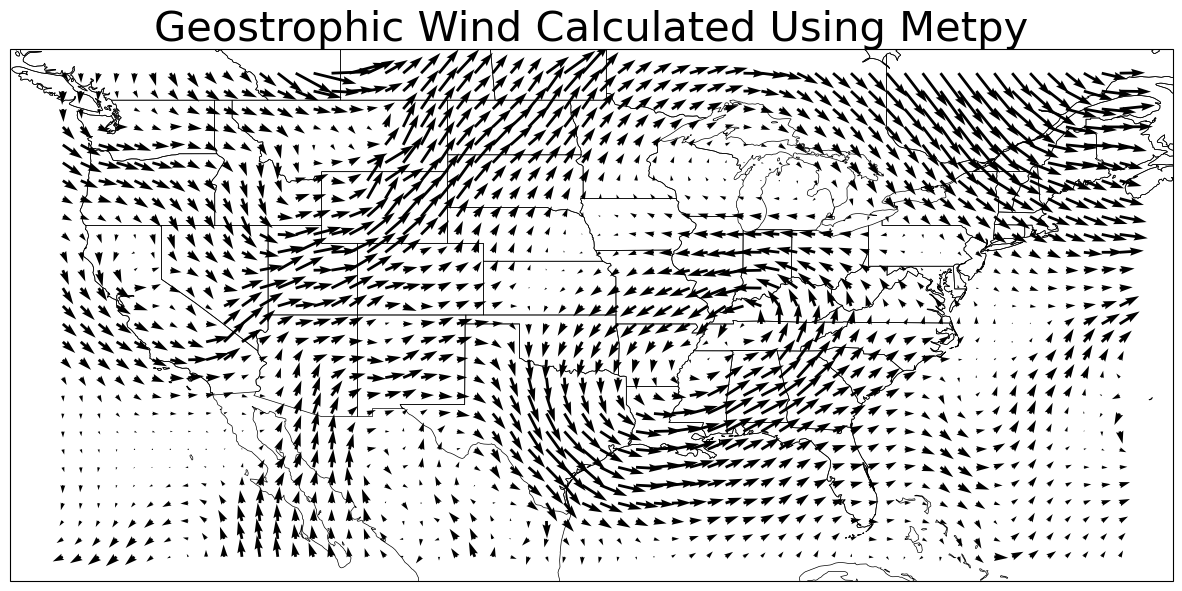

In [11]:
dataproj = ccrs. PlateCarree ()
# # Plot projection
# # The look you want for the view.
plotproj = ccrs. PlateCarree ()
fig=plt.figure(1, figsize=(15.,12.))

ax=plt.subplot(111,projection=plotproj)

ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
plt.title("Geostrophic Wind Calculated Using Metpy",size = 30)
plt.quiver (new_data.lon, new_data.lat, U[0,12,:,:],V[0,12,:,:],minlength = 0.5,units='width')
# plt.colorbar (orientation = "horizontal", pad=0.01).ax.tick_params(labelsize=20)
plt. show ()

In [12]:
qx, qy = q_vector(U,V,T,p)

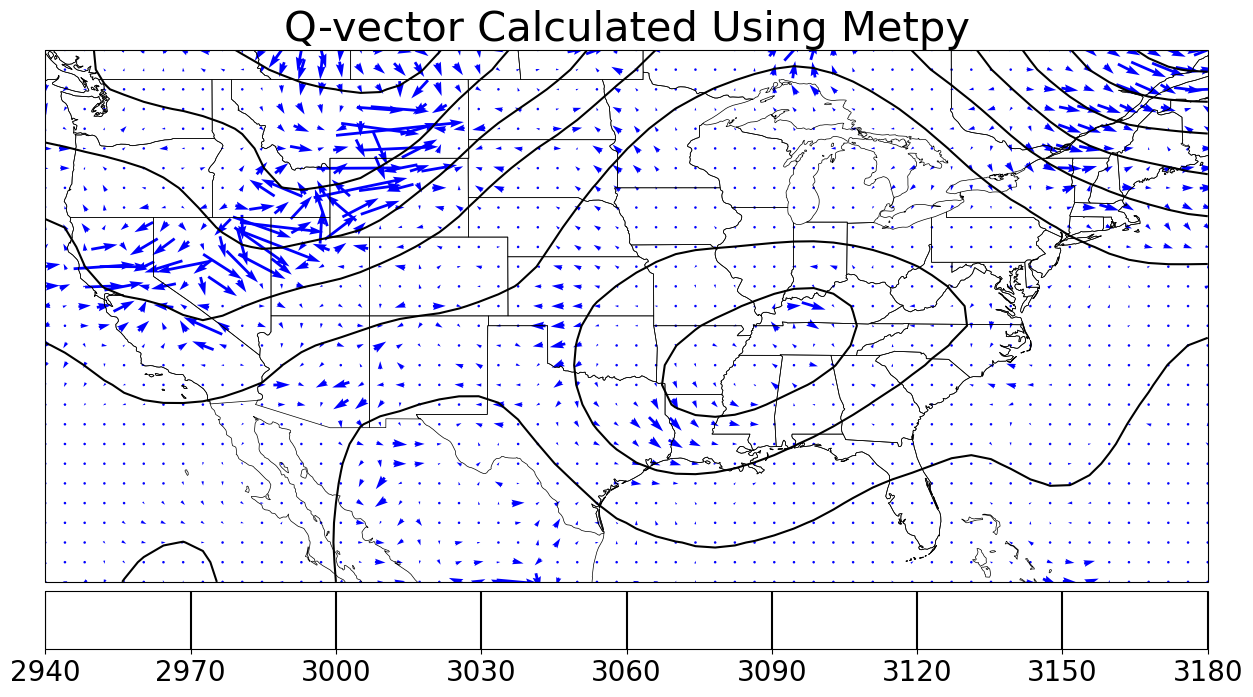

In [13]:
dataproj = ccrs. PlateCarree ()
# # Plot projection
# # The look you want for the view.
plotproj = ccrs. PlateCarree ()
fig=plt.figure(1, figsize=(15.,12.))

ax=plt.subplot(111,projection=plotproj)

ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
plt.title("Q-vector Calculated Using Metpy",size = 30)

plt.contour(new_data.lon, new_data.lat,gaussian_filter(gph[0,12,:,:],1), colors = "black")
# plt.contourf(new_data.lon, new_data.lat, new_data.OMEGA[0,12,:,:],levels =np.arange(-2,2,0.2),cmap = "RdBu", transform=dataproj,extend = "both" )
plt.colorbar (orientation = "horizontal", pad=0.01).ax.tick_params(labelsize=20)
# plt.colorbar (orientation = "horizontal", pad=0.01).ax.tick_params(labelsize=20)
plt.quiver (new_data.lon, new_data.lat, qx[0,12,:,:],gaussian_filter(qy[0,12,:,:],0.7), color='blue',pivot='mid', 
          scale=1e-11, scale_units='inches',
          transform=dataproj)

# gaussian_filter(data, sigma)
plt. show ()